In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
data = pd.read_csv('../../data/penguins_cleaned.csv')

In [197]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [198]:
from sklearn import preprocessing 
LE=preprocessing.LabelEncoder()

In [199]:
lter_encode=data.copy()
lter_encode['island']=LE.fit_transform(lter_encode['island'])
lter_encode['clutch_completion']=LE.fit_transform(lter_encode['clutch_completion'])
lter_encode['sex']=LE.fit_transform(lter_encode['sex'])
lter_encode['date_egg']=LE.fit_transform(lter_encode['date_egg'])
lter_encode['species_code']=LE.fit_transform(lter_encode['species'])
lter_encode.head()

,species,island,clutch_completion,date_egg,bill_length,bill_depth,flipper_length,body_mass,sex,del15,del13,species_code
0,Adelie,2,1,2,39.1,18.7,181.0,3750.0,1,8.859733,-25.804194,0
1,Adelie,2,1,2,39.5,17.4,186.0,3800.0,0,8.949560,-24.694540,0
2,Adelie,2,1,6,40.3,18.0,195.0,3250.0,0,8.368210,-25.333020,0
3,Adelie,2,1,6,36.7,19.3,193.0,3450.0,0,8.766510,-25.324260,0
4,Adelie,2,1,6,39.3,20.6,190.0,3650.0,1,8.664960,-25.298050,0


# Sélection des variables

In [200]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')

In [201]:
X=lter_encode.drop(['species','species_code'], axis=1)
Y=lter_encode['species']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(lter_encode.shape[1],'Score')) 

             Feature       Score
5     flipper_length  594.801627
3        bill_length  410.600255
4         bill_depth  359.789149
6          body_mass  343.626275
9              del13  234.897119
8              del15  229.625963
0             island  150.350633
1  clutch_completion    5.554315
2           date_egg    4.368453
7                sex    0.283857


In [202]:
data = data.drop(
    columns=[
        'clutch_completion',
        'date_egg',
        'sex'
    ]
)

# Préparation des données

## OHE

In [203]:
data = pd.get_dummies(data,columns=['island'])
data

,species,bill_length,bill_depth,flipper_length,body_mass,del15,del13,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,8.859733,-25.804194,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,8.949560,-24.694540,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,8.368210,-25.333020,0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,8.766510,-25.324260,0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,8.664960,-25.298050,0,0,1
...,...,...,...,...,...,...,...,...,...,...
337,Chinstrap,55.8,19.8,207.0,4000.0,9.704650,-24.534940,0,1,0
338,Chinstrap,43.5,18.1,202.0,3400.0,9.376080,-24.407530,0,1,0
339,Chinstrap,49.6,18.2,193.0,3775.0,9.461800,-24.706150,0,1,0
340,Chinstrap,50.8,19.0,210.0,4100.0,9.980440,-24.687410,0,1,0


## Standardization

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scale=StandardScaler()
scale.fit(data.drop(['species','island_Biscoe','island_Dream','island_Torgersen'],axis=1))
transformed=scale.transform(data.drop(['species','island_Biscoe','island_Dream','island_Torgersen'],axis=1))
X_scaled=pd.DataFrame(transformed,columns=data.columns[1:7])
X_scaled[['island_Biscoe','island_Dream','island_Torgersen']]=data[['island_Biscoe','island_Dream','island_Torgersen']]
X_scaled

,bill_length,bill_depth,flipper_length,body_mass,del15,del13,island_Biscoe,island_Dream,island_Torgersen
0,-0.884499,0.785449,-1.418347,-0.564142,0.225043,-0.144751,0,0,1
1,-0.811126,0.126188,-1.062250,-0.501703,0.390384,1.276753,0,0,1
2,-0.664380,0.430462,-0.421277,-1.188532,-0.679681,0.458838,0,0,1
3,-1.324737,1.089724,-0.563715,-0.938776,0.053452,0.470060,0,0,1
4,-0.847812,1.748985,-0.777373,-0.689020,-0.133466,0.503636,0,0,1
...,...,...,...,...,...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947,1.780245,1.481206,0,1,0
338,-0.077396,0.481175,0.077258,-1.001215,1.175461,1.644423,0,1,0
339,1.041543,0.531887,-0.563715,-0.532923,1.333241,1.261880,0,1,0
340,1.261662,0.937586,0.647013,-0.127069,2.287879,1.285887,0,1,0


## Séparation du jeu de données

In [206]:
from sklearn.model_selection import train_test_split
X = X_scaled
y = data['species']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,data['species'],test_size=0.25)

# Application des méthodes

## KNN

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [208]:
n_neighbors_list = np.arange(1, 100)
# hyper-paramètre
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, cv=10)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 1}
1.0


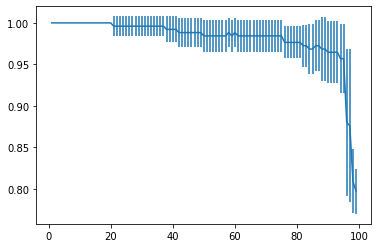

In [209]:
dfgrid = pd.DataFrame(
    dict(n_neighbors = d["n_neighbors"], error=e, std=s)
    for d, e, s in zip(
        search.cv_results_["params"],
        search.cv_results_["mean_test_score"],
        search.cv_results_["std_test_score"],
    )
)
plt.errorbar(dfgrid["n_neighbors"], dfgrid["error"], yerr=dfgrid["std"])
plt.show()

In [210]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
preds_knn = knn.predict(X_test)
print(confusion_matrix(y_test,preds_knn))
print(classification_report(y_test, preds_knn))

[[38  0  0]
 [ 0 14  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        38
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        34

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



## Apprentissage avec PCA

In [211]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
print('Ratios:',pca.explained_variance_ratio_*100)#Ratio per component.

Ratios: [5.40936484e+01 2.29864840e+01 8.27458313e+00 5.56729016e+00
 3.08389327e+00 2.32667814e+00 2.20703257e+00 1.46039027e+00
 2.12702013e-31]


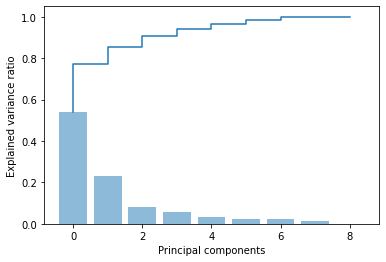

In [212]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5)
plt.step(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.show()

In [213]:
pca = PCA(n_components=3)
X = X_scaled
y = data['species']
X_train,X_test,y_train,y_test=train_test_split(X_scaled,data['species'],test_size=0.25)
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 

### KNN

In [214]:
n_neighbors_list = np.arange(1, 100)
# hyper-paramètre
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, cv=10)
search.fit(X_train_pca, y_train)
print(search.best_params_)
print(search.best_score_)

{'n_neighbors': 3}
0.992153846153846


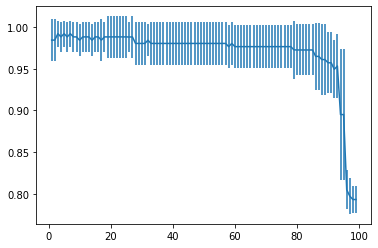

In [215]:
dfgrid = pd.DataFrame(
    dict(n_neighbors = d["n_neighbors"], error=e, std=s)
    for d, e, s in zip(
        search.cv_results_["params"],
        search.cv_results_["mean_test_score"],
        search.cv_results_["std_test_score"],
    )
)
plt.errorbar(dfgrid["n_neighbors"], dfgrid["error"], yerr=dfgrid["std"])
plt.show()

In [216]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_pca,y_train)
preds_knn = knn.predict(X_test_pca)
print(confusion_matrix(y_test,preds_knn))
print(classification_report(y_test, preds_knn))

[[36  0  0]
 [ 0 15  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        36
   Chinstrap       1.00      1.00      1.00        15
      Gentoo       1.00      1.00      1.00        35

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



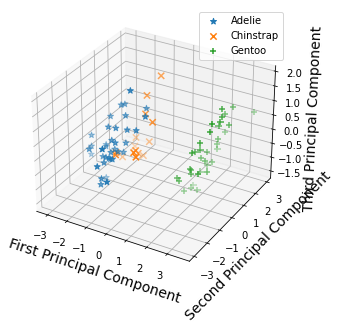

In [217]:
X_pca = X_test_pca
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {'Adelie':'red','Chinstrap':'green','Gentoo':'blue'}
marker = {'Adelie':'*','Chinstrap':'x','Gentoo':'+'}
alpha = {'0':.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(preds_knn):
    ix=np.where(preds_knn==l)
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], s=40,label=l, marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

<AxesSubplot:>

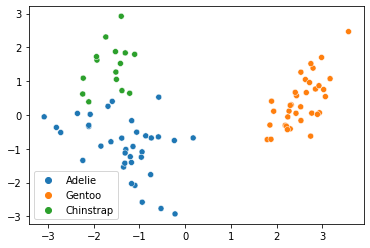

In [218]:
import seaborn as sns
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=preds_knn)

## Analyse discriminante

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [220]:
def add_decision_boundary(
    model, levels=None, resolution=100, ax=None, label=None, color=None, region=True
):
    """Trace une frontière et des régions de décision sur une figure existante.

    La fonction requiert un modèle scikit-learn `model` pour prédire
    un score ou une classe. La discrétisation utilisée est fixée par
    l'argument `resolution`. Une (ou plusieurs frontières) sont
    ensuite tracées d'après le paramètre `levels` qui fixe la valeur
    des lignes de niveaux recherchées.

    """

    if ax is None:
        ax = plt.gca()

    # Create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], resolution)
    yy = np.linspace(ylim[0], ylim[1], resolution)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.predict(xy).reshape(XX.shape)

    cat2num = {cat: num for num, cat in enumerate(model.classes_)}
    num2cat = {num: cat for num, cat in enumerate(model.classes_)}
    vcat2num = np.vectorize(lambda x: cat2num[x])
    Z_num = vcat2num(Z)

    # Add decision boundary to legend
    color = "b" if color is None else color
    sns.lineplot(x=[0], y=[0], label=label, ax=ax, color=color, linestyle="dashed")
    mask = np.zeros_like(Z_num, dtype=bool)
    for k in range(len(model.classes_) - 1):
        mask |= Z_num == k - 1
        Z_num_mask = np.ma.array(Z_num, mask=mask)
        ax.contour(
            XX,
            YY,
            Z_num_mask,
            levels=[k + 0.5],
            linestyles="dashed",
            corner_mask=True,
            colors=[color],
            antialiased=True,
        )

    if region:
        # Hack to get colors
        # TODO use legend_out = True
        slabels = [str(l) for l in model.classes_]
        hdls, hlabels = ax.get_legend_handles_labels()
        hlabels_hdls = {l: h for l, h in zip(hlabels, hdls)}

        color_dict = {}
        for label in model.classes_:
            if str(label) in hlabels_hdls:
                hdl = hlabels_hdls[str(label)]
                color = hdl.get_facecolor().ravel()
                color_dict[label] = color
            else:
                raise Exception("No corresponding label found for ", label)

        colors = [color_dict[num2cat[i]] for i in range(len(model.classes_))]
        cmap = mpl.colors.ListedColormap(colors)

        ax.imshow(
            Z_num,
            interpolation="nearest",
            extent=ax.get_xlim() + ax.get_ylim(),
            aspect="auto",
            origin="lower",
            cmap=cmap,
            alpha=0.2,
        )

In [221]:
colors = sns.color_palette()

In [222]:
lda = LinearDiscriminantAnalysis()
modelLDA = lda.fit(X_train_pca[:, 0:2], y_train)

In [223]:
print(modelLDA.priors_)

[0.44921875 0.20703125 0.34375   ]


In [224]:
predLDA=modelLDA.predict(X_test_pca[:, 0:2])
print(np.unique(predLDA, return_counts=True))

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype='<U9'), array([36, 15, 35], dtype=int64))


In [225]:
print(confusion_matrix(predLDA, y_test))
print(classification_report(y_test, predLDA, digits=3))

[[36  0  0]
 [ 0 15  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

      Adelie      1.000     1.000     1.000        36
   Chinstrap      1.000     1.000     1.000        15
      Gentoo      1.000     1.000     1.000        35

    accuracy                          1.000        86
   macro avg      1.000     1.000     1.000        86
weighted avg      1.000     1.000     1.000        86



In [226]:
qda = QuadraticDiscriminantAnalysis()
modelQDA = qda.fit(X_train_pca[:, 0:2], y_train)

In [227]:
print(modelQDA.priors_)

[0.44921875 0.20703125 0.34375   ]


In [228]:
predQDA=modelQDA.predict(X_test_pca[:, 0:2])
print(np.unique(predQDA, return_counts=True))

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object), array([37, 14, 35], dtype=int64))


In [229]:
print(confusion_matrix(predQDA, y_test))
print(classification_report(y_test, predQDA, digits=3))

[[36  1  0]
 [ 0 14  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

      Adelie      0.973     1.000     0.986        36
   Chinstrap      1.000     0.933     0.966        15
      Gentoo      1.000     1.000     1.000        35

    accuracy                          0.988        86
   macro avg      0.991     0.978     0.984        86
weighted avg      0.989     0.988     0.988        86



In [230]:
nb = GaussianNB()
modelNB = nb.fit(X_train_pca[:, 0:2], y_train)

In [231]:
predNB=modelNB.predict(X_test_pca[:, 0:2])
print(np.unique(predNB, return_counts=True))

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype='<U9'), array([37, 14, 35], dtype=int64))


In [232]:
print(confusion_matrix(predNB, y_test))
print(classification_report(y_test, predNB, digits=3))

[[36  1  0]
 [ 0 14  0]
 [ 0  0 35]]
              precision    recall  f1-score   support

      Adelie      0.973     1.000     0.986        36
   Chinstrap      1.000     0.933     0.966        15
      Gentoo      1.000     1.000     1.000        35

    accuracy                          0.988        86
   macro avg      0.991     0.978     0.984        86
weighted avg      0.989     0.988     0.988        86



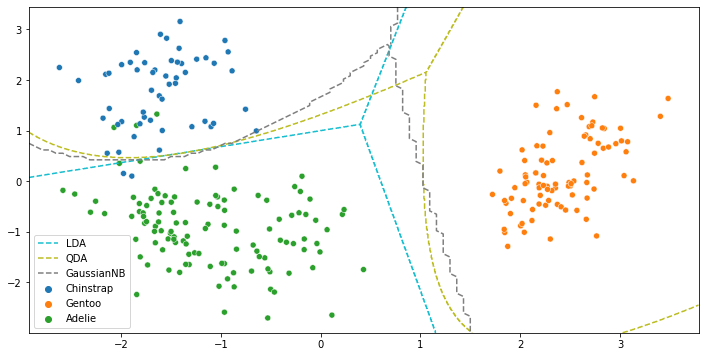

In [233]:
colors = sns.color_palette()
fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train,ax=ax1)
add_decision_boundary(modelLDA, label="LDA", color=colors.pop(), region=False, 
                      resolution=1000)
add_decision_boundary(modelQDA, label="QDA", color=colors.pop(), region=False,
                      resolution=1000)
add_decision_boundary(modelNB, label="GaussianNB", color=colors.pop(), region=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1dd35576-464a-4d46-a0e6-752fc35b7463' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>